In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression

# Import the data

In [34]:
data = pd.read_csv('../02_data/02_treated_data/preprocessed_data.csv', index_col = 0)

# Transform data

In [35]:
# Use one hot encoding to deal with categorical variables

# Select categorical columns to be encoded
cat_cols = data.select_dtypes(include='object').columns
cat_cols

# Use one hot encoding to encode categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[cat_cols]).toarray()
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
# Take a look at the encoded features
encoded_data.head()

,Status of existing checking account_0_to_200_dm,Status of existing checking account_greater_than_200_dm,Status of existing checking account_less_than_0_dm,Status of existing checking account_no_checking_account,Credit history_all_credits_paid_back,Credit history_critical_account,Credit history_delay_in_past,Credit history_existing_credits_paid_back_till_now,Credit history_no_credits_taken,Purpose_business,...,Housing_own,Housing_rent,Job_management_self_employed_highly_qualified,Job_skilled_employee,Job_unemployed_unskilled_non_resident,Job_unskilled_resident,Telephone_none,Telephone_yes,Foreign worker_no,Foreign worker_yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
# Select numerical columns to be concatenated with encoded columns
num_cols = data.select_dtypes(include='number').columns
df_concatenated = pd.concat([data[num_cols], encoded_data], axis=1)
# Take a look at the full data with encoded features
df_concatenated.head()

,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Credit risk,Number of Accounts,Status of existing checking account_0_to_200_dm,...,Housing_own,Housing_rent,Job_management_self_employed_highly_qualified,Job_skilled_employee,Job_unemployed_unskilled_non_resident,Job_unskilled_resident,Telephone_none,Telephone_yes,Foreign worker_no,Foreign worker_yes
0,6,1169,4,4,67,2,1,0,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,48,5951,2,2,22,1,1,1,2,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,12,2096,2,3,49,1,2,0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,42,7882,2,4,45,1,2,0,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24,4870,3,4,53,2,2,1,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [37]:
y = df_concatenated['Credit risk']
X = df_concatenated.drop('Credit risk', axis = 1)

In [38]:
# Drop the number of accounts feature because I believe I should not use it in the modelling
X.drop('Number of Accounts', axis = 1, inplace = True)

In [39]:
# Split the data into train and test set using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model Selection and Training

I will use a logistic regression model to predict the credit risk. In order to find the best model for this task, I will follow the steps outlined below:

1. Use GridSearchCV to find the best parameters for the model, with a 5-fold cross validation
2. Use a finer grid to tune the parameters around the best parameters found in the previous step
3. Use the best parameters found in the previous step to train the model
4. Use the precision-recall curve to evaluate the model and check if I can improve the model by changing the threshold
5. Compare the model found in step 3 with the model found in step 4 and choose the best out of both

#### Step 1: Use GridSearchCV to find the best parameters for the model, with a 5-fold cross validation

In [40]:
# Define the grid of values for the hyperparameters
param_grid = {'penalty' : ['l1', 'l2'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a logistic regression model
log_reg_model = LogisticRegression(random_state = 1, max_iter = 10000, solver = 'liblinear')

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator = log_reg_model, param_grid = param_grid, scoring = 'recall', cv = 5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
print(f'Best hyperparameters are {grid_search.best_params_} with a score of {grid_search.best_score_}')

Best hyperparameters are {'C': 10, 'penalty': 'l1'} with a score of 0.5020408163265306


#### Step 2: Use a finer grid to tune the parameters around the best parameters found in the previous step

Now I will stick to the L1 penalty and look at a finer grid to tune the C hyperparameter around the best value obtained in the previous step.

Since I have few observations in my data set and the grid search is running relatively fast, I will use the GridSearchCV function. If I had a larger data set or more hyperparameters to tune, I could use the RandomizedSearchCV function instead to speed up the tuning.

In [41]:
# Define the grid of values for the hyperparameters
param_grid = {'C' : list(np.arange(5, 15, 0.1))}

# Create a logistic regression model
log_reg_model = LogisticRegression(random_state=1, max_iter=10000, solver='liblinear', penalty = 'l1')

# Create a GridSearchCV instance
finer_grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, scoring='recall', cv=5)

# Perform the grid search
finer_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
print(f'Best hyperparameters are {finer_grid_search.best_params_} with a score of {finer_grid_search.best_score_}')

Best hyperparameters are {'C': 5.199999999999999} with a score of 0.5020408163265306


This fine tuning found another value for the C hyperparameter but with the same score as the previous one. I tested some other values around this new one (not shown here), and found that the evaluation metric was not much stable around it, so I will stick to the previous value of C = 10.

#### Step 3: Use the best parameters found in the previous step to train the model

In [42]:
# Get the best model
best_model = grid_search.best_estimator_

# Train the model
best_model.fit(X_train, y_train)

# Get the predictions of the model
y_pred = best_model.predict(X_test)

In [43]:
# Get evaluation metrics for the best model
f1_score_best_model = f1_score(y_test, y_pred)
precision_best_model = precision_score(y_test, y_pred)
recall_best_model = recall_score(y_test, y_pred)

#### Step 4: Use the precision-recall curve to evaluate the model and check if I can improve the model by changing the threshold

Previous threshold = 0.500000, F1-Score = 0.500
Best Threshold = 0.334641, F1-Score = 0.603


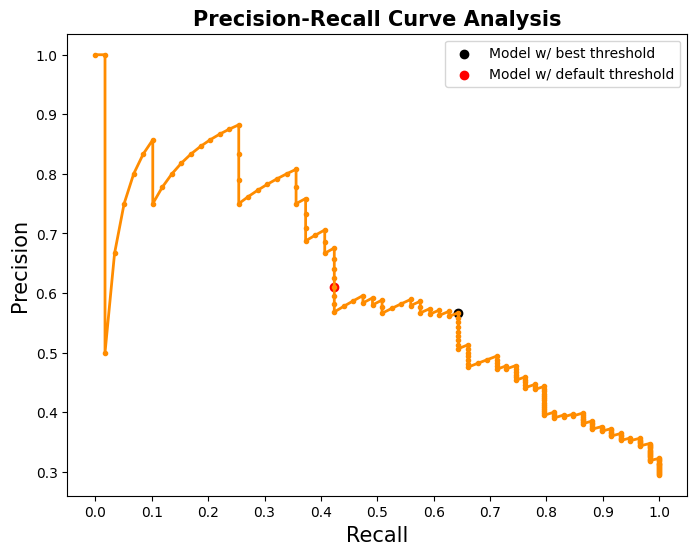

In [44]:
# Calculate the precision, recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot the precision - recall curve
fig = plt.figure(figsize = (8,6))

plt.plot(recall, precision, color = 'darkorange', lw = 2, marker = '.')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)
plt.title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)

# Find the best threshold based on the f1 score
# Find the F1 score for each threshold
f1_score = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score and plot on the graph
ix = np.argmax(f1_score)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Model w/ best threshold')
# plot the precision - recall for the best model with default threshold
plt.scatter(recall_best_model, precision_best_model, marker='o', color='red', label='Model w/ default threshold')

plt.legend()

# Print the precision - recall of the best model found in step 3 and the model with the best threshold
print('Previous threshold = %f, F1-Score = %.3f' % (0.5, f1_score_best_model))
print('Best Threshold = %f, F1-Score = %.3f' % (thresholds[ix], f1_score[ix]))

#### Step 5: Compare the model found in step 3 with the model found in step 4 

In [45]:
# Evaluation metrics for the best model
print('Evaluation metrics for the best model:')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')

# Evaluation metrics for the model with the best threshold
y_pred_best_threshold = (best_model.predict_proba(X_test)[:, 1] >= thresholds[ix]).astype(bool)
print('Evaluation metrics for the model with the best threshold:')
print(classification_report(y_test, y_pred_best_threshold))
print(confusion_matrix(y_test, y_pred_best_threshold))

Evaluation metrics for the best model:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       141
           1       0.61      0.42      0.50        59

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200

[[125  16]
 [ 34  25]]


Evaluation metrics for the model with the best threshold:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       141
           1       0.57      0.64      0.60        59

    accuracy                           0.75       200
   macro avg       0.70      0.72      0.71       200
weighted avg       0.76      0.75      0.75       200

[[112  29]
 [ 21  38]]


The best model found in step 3 has a higher precision, however it performs considerably worst in terms of recall and f1-score.

By changing the threshold, I improved the recall in 22 p.p. and the f1-score in 10 p.p., while the precision decreased by only 4 p.p.

Thinking about the business of credit lending, I believe it is highly important to correctly target those that will be bad loans, even if it means that I will also target some good loans in the process. This means that I should choose the model with the higher recall, i.e., the model with the best threshold.

# Model Evaluation

In [46]:
# Print evaluation metrics for the model with the best threshold

# Classification report
y_pred_best_threshold = (best_model.predict_proba(X_test)[:, 1] >= thresholds[ix]).astype(bool)
print('Evaluation metrics for the model with the best threshold:')
print(classification_report(y_test, y_pred_best_threshold))

# Confusion matrix
print('Confusion matrix for the model with the best threshold:')
print(confusion_matrix(y_test, y_pred_best_threshold))

Evaluation metrics for the model with the best threshold:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       141
           1       0.57      0.64      0.60        59

    accuracy                           0.75       200
   macro avg       0.70      0.72      0.71       200
weighted avg       0.76      0.75      0.75       200

Confusion matrix for the model with the best threshold:
[[112  29]
 [ 21  38]]


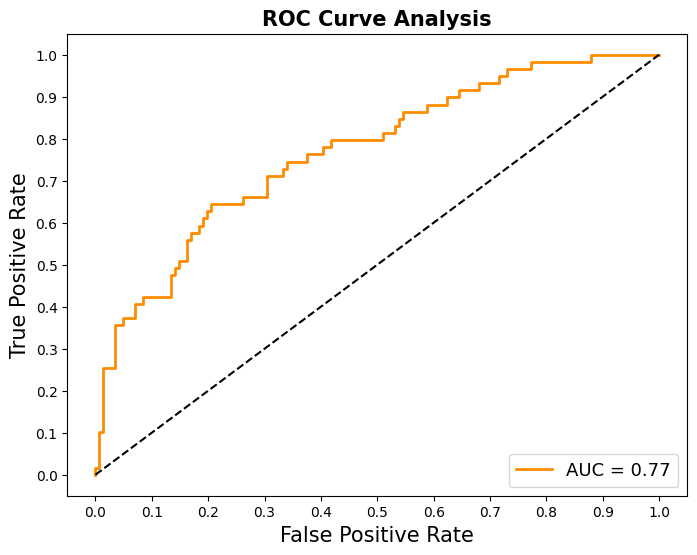

In [47]:
# Let's also take a look at the ROC AUC Curve and the ROC AUC Score for the model we have selected

# Plot ROC AUC Curve and roc auc score
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

fig = plt.figure(figsize = (8,6))

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color = 'darkorange', lw = 2)

plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

In [48]:
# Finally, let's also take a look to see what are the features the model is using
# this is important to better understand how the model is making its predictions

print(f'Number of features used by the model is {np.count_nonzero(best_model.coef_)} out of {X.shape[1]} features')

# Get the indices of the features used by the model
indices = np.nonzero(best_model.coef_)[1]

# Get the names of the features used by the model
features = X.columns[indices]

# Get the coefficients of the features used by the model
coefficients = best_model.coef_[0][indices]

# Create a dataframe with the features and their coefficients
features_df = pd.DataFrame({'Feature' : features, 'Coefficient' : coefficients})

# Sort the dataframe by the absolute value of the coefficients
features_df['Absolute coefficient'] = features_df['Coefficient'].apply(lambda x: abs(x))

features_df.sort_values(by = 'Absolute coefficient', ascending = False, inplace = True)

# Display the dataframe with the 10 highest coefficients
# (even thought it is not sufificient to look at the coefficients to know what are the most important features, 
# it gives us a fairly good idea, specially because most features are dummy variables)
print('Features with 10 highest coefficients are:')
features_df.head(10)

Number of features used by the model is 50 out of 61 features
Features with 10 highest coefficients are:


,Feature,Coefficient,Absolute coefficient
16,Purpose_car_used,-1.568540,1.568540
11,Credit history_critical_account,-1.463718,1.463718
34,Other debtors / guarantors_guarantor,-1.456170,1.456170
48,Foreign worker_no,-1.407675,1.407675
25,Savings account/bonds_greater_than_1000_dm,-1.228509,1.228509
10,Status of existing checking account_no_checkin...,-1.207620,1.207620
23,Purpose_retraining,-1.172450,1.172450
12,Credit history_delay_in_past,-0.737754,0.737754
29,Present employment since_4_7_years,-0.700537,0.700537
35,Other debtors / guarantors_none,-0.670791,0.670791


#### Conclusion

Even thought the metrics are not high, I have tuned the model to obtain the best recall measure possible. I did so because I believe that it is important in this business to correctly classify bad loans, even if it means that I will also classify some good loans as bad. I am assuming here that our goal is to maximize the returns on the loans, given for instance by the amount applicants are paying back to the bank (in the form of principal + interests) dividided by the loan amount. So it seems to me fair enough to try as hard as possible to avoid bad loans.

In order to illustrate the value of this model, let's assume that the bank makes 200 loans of $100 each, 141 of which will be good and 59 of which will be bad (following the target variable distribution in the test set). Assume also that bad loans have a zero return to the bank (applicants pay nothing back), and that good loans have a return of 1.5 (applicants pay 50% more than the loan amount). 

If the bank uses the model to classify the loans and then decides to give loans only to those classified as good loans, it will give loans to 133 applicants predicted to be good (112 good + 21 bad). So it will receive back 112 * 100 * 1.5 = $16,800 (from the good loans), while it will loan 133 * 100 = $13,300. So the bank will make a profit of $3,500.

If the bank does not use the model, it will give loans to every applicant. Then it will receive back 141 * 100 * 1.5 = $21,150, while it will concede 200 * 100 = $20,000. So the bank will make a profit of only $1,150.

This is a very simple example, highly dependent on the assumptions I made, but it shows in a simple manner that even a model far from perfect can be useful to the bank to increase its profits. 